In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg','pdf')

import csv
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import CubicSpline

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times'
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['lines.markersize'] = 3

Nt = 512
t = np.linspace(0, 24, Nt)

### DNI

In [3]:
DNI_june = np.loadtxt('./SalamancaJune/Salamanca_June_DNI.csv', delimiter=";", dtype=float)
DNI_march = np.loadtxt('./SalamancaMarch/Salamanca_March_DNI.csv', delimiter=";", dtype=float)
DNI_dec = np.loadtxt('./SalamancaDec/Salamanca_Dec_DNI.csv', delimiter=";", dtype=float)

# Interpolacion
DNI_june = 0.1*np.interp(t, DNI_june[:,0], DNI_june[:,1])
DNI_march = 0.1*np.interp(t, DNI_march[:,0], DNI_march[:,1])
DNI_dec = 0.1*np.interp(t, DNI_dec[:,0], DNI_dec[:,1])

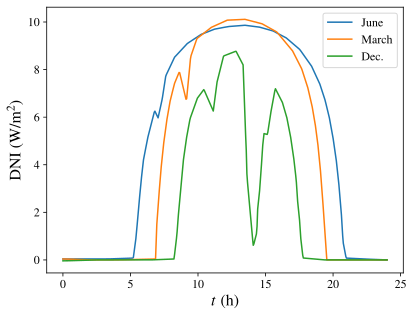

In [4]:
plt.plot(t, DNI_june, t, DNI_march, t, DNI_dec)
plt.xlabel(r'$t$ (h)')
plt.ylabel(r'DNI (W/m$^2$)')
plt.legend(['June', 'March', 'Dec.'])
plt.show()

### Thermal efficiency

In [5]:
etaTh_june = np.loadtxt('./SalamancaJune/Salamanca_June_etaTh.csv', delimiter=";", dtype=float)
etaTh_march = np.loadtxt('./SalamancaMarch/Salamanca_March_etaTh.csv', delimiter=";", dtype=float)
etaTh_dec = np.loadtxt('./SalamancaDec/Salamanca_Dec_etaTh.csv', delimiter=";", dtype=float)

# Interpolacion
etaTh_june = np.interp(t, etaTh_june[:,0], etaTh_june[:,1])
etaTh_march = np.interp(t, etaTh_march[:,0], etaTh_march[:,1])
etaTh_dec = np.interp(t, etaTh_dec[:,0], etaTh_dec[:,1])

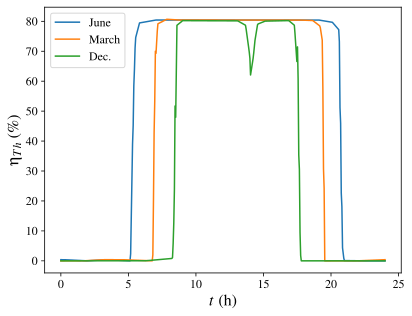

In [6]:
plt.plot(t, etaTh_june, t, etaTh_march, t, etaTh_dec)
plt.xlabel(r'$t$ (h)')
plt.ylabel(r'$\eta_{Th}$ (\%)')
plt.legend(['June', 'March', 'Dec.'])
plt.show()

### Optical efficiency

In [7]:
etaOpt_june = np.loadtxt('./SalamancaJune/Salamanca_June_etaOpt.csv', delimiter=";", dtype=float)
etaOpt_march = np.loadtxt('./SalamancaMarch/Salamanca_March_etaOpt.csv', delimiter=";", dtype=float)
etaOpt_dec = np.loadtxt('./SalamancaDec/Salamanca_Dec_etaOpt.csv', delimiter=";", dtype=float)

# Interpolacion
etaOpt_june = np.interp(t, etaOpt_june[:,0], etaOpt_june[:,1])
etaOpt_march = np.interp(t, etaOpt_march[:,0], etaOpt_march[:,1])
etaOpt_dec = np.interp(t, etaOpt_dec[:,0], etaOpt_dec[:,1])

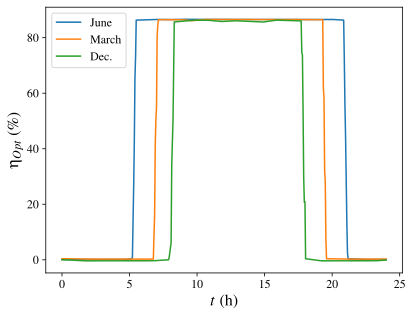

In [8]:
plt.plot(t, etaOpt_june, t, etaOpt_march, t, etaOpt_dec)
plt.xlabel(r'$t$ (h)')
plt.ylabel(r'$\eta_{Opt}$ (\%)')
plt.legend(['June', 'March', 'Dec.'])
plt.show()

### Ambient temperature

In [9]:
Tamb_june = np.loadtxt('./SalamancaJune/Salamanca_June_Tamb.csv', delimiter=";", dtype=float)
Tamb_march = np.loadtxt('./SalamancaMarch/Salamanca_March_Tamb.csv', delimiter=";", dtype=float)
Tamb_dec = np.loadtxt('./SalamancaDec/Salamanca_Dec_Tamb.csv', delimiter=";", dtype=float)

# Interpolacion
Tamb_june = np.interp(t, Tamb_june[:,0], Tamb_june[:,1])
Tamb_march = np.interp(t, Tamb_march[:,0], Tamb_march[:,1])
Tamb_dec = np.interp(t, Tamb_dec[:,0], Tamb_dec[:,1])

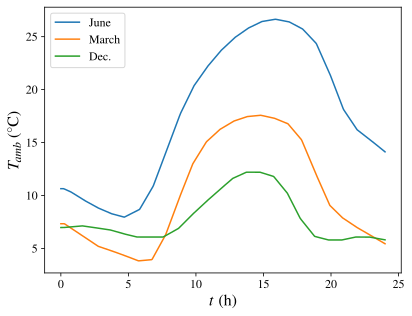

In [10]:
plt.plot(t, Tamb_june, t, Tamb_march, t, Tamb_dec)
plt.xlabel(r'$t$ (h)')
plt.ylabel(r'$T_{amb}$ ($^\circ$C)')
plt.legend(['June', 'March', 'Dec.'])
plt.show()

### Absorbed heat flux

In [11]:
Qr_june = DNI_june*etaOpt_june/100*etaTh_june/100
Qr_march = DNI_march*etaOpt_march/100*etaTh_march/100
Qr_dec = DNI_dec*etaOpt_dec/100*etaTh_dec/100

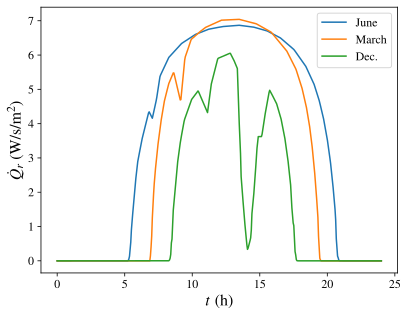

In [12]:
plt.plot(t, Qr_june, t, Qr_march, t, Qr_dec)
plt.xlabel(r'$t$ (h)')
plt.ylabel(r'$\dot{Q}_r$ (W/s/m$^2$)')
plt.legend(['June', 'March', 'Dec.'])
plt.show()

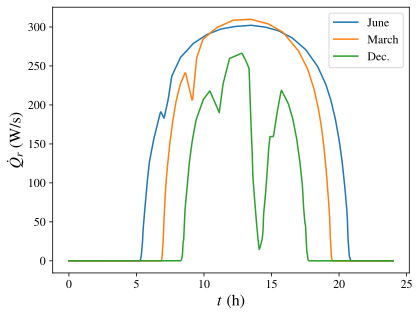

In [13]:
Ad = 44

plt.plot(t, Qr_june*44, t, Qr_march*44, t, Qr_dec*44)
plt.xlabel(r'$t$ (h)')
plt.ylabel(r'$\dot{Q}_r$ (W/s)')
plt.legend(['June', 'March', 'Dec.'])
plt.show()

In [14]:
Gdem = 0.001
T1 = 300
Cp = 1e3

phi_june = Ad*Qr_june/Gdem/T1/Cp
phi_march = Ad*Qr_march/Gdem/T1/Cp
phi_dec = Ad*Qr_dec/Gdem/T1/Cp

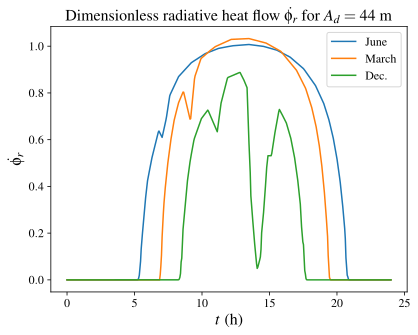

In [15]:
plt.plot(t, phi_june, t, phi_march, t, phi_dec)
plt.xlabel(r'$t$ (h)')
plt.ylabel(r'$\dot{\phi}_r$')
plt.legend(['June', 'March', 'Dec.'])
plt.title(r'Dimensionless radiative heat flow $\dot{\phi}_r$ for $A_d = 44$ m')
plt.show()

### Isentropic compression 1-2

In [16]:
# Libro Fernandez-Feria: en la práctica se usan las relaciones isentrópicas
# con un exponente "n" que ajuste a los resultados reales
gamma = 1.7
T0 = 300
p0 = 101325
h0 = 300e3
g0 = 1e-3

In [17]:
Tamb = np.concatenate((Tamb_june[:,np.newaxis], Tamb_march[:,np.newaxis], \
                      Tamb_dec[:,np.newaxis]), axis=1)

G1 = Tamb*0 + g0/g0
theta1 = (Tamb + 273)/T0
x1 = Tamb*0 + p0/p0
H1 = Tamb*0 + h0/h0

# The dimensionless power is initialluy constant
xi1 = Tamb*0 + 1
W12 = Tamb*0 + 0.5

H2 = W12/G1 + H1
xi2 = xi1*(W12/G1/H1 + 1)**(gamma/(gamma - 1))
theta2 = xi2**((gamma - 1)/gamma)*theta1

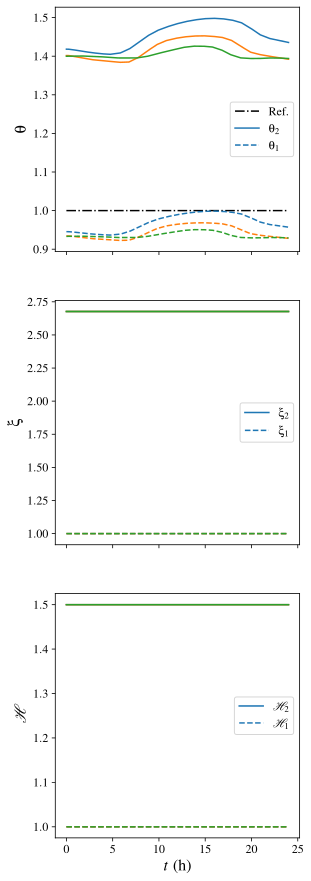

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15,15))

ax1.plot(t, t*0 + 1, 'k-.')
ax1.plot(t, theta2)
ax1.set_prop_cycle(None)
ax1.plot(t, theta1, '--')
ax1.set_ylabel(r'$\theta$')
ax1.legend(['Ref.', r'$\theta_2$', '_nolegend_', '_nolegend_', r'$\theta_1$'])
ax1.set_aspect(1.0/ax1.get_data_ratio(), adjustable='box')

ax2.plot(t, xi2)
ax2.set_prop_cycle(None)
ax2.plot(t, xi1, '--')
ax2.set_ylabel(r'$\xi$')
ax2.legend([r'$\xi_2$', '_nolegend_', '_nolegend_', r'$\xi_1$'])
ax2.set_aspect(1.0/ax2.get_data_ratio(), adjustable='box')

ax3.plot(t, H2)
ax3.set_prop_cycle(None)
ax3.plot(t, H1, '--')
plt.xlabel(r'$t$ (h)')
ax3.set_ylabel(r'$\mathcal{H}$')
ax3.legend([r'$\mathcal{H}_2$', '_nolegend_', '_nolegend_', r'$\mathcal{H}_1$'])
ax3.set_aspect(1.0/ax3.get_data_ratio(), adjustable='box')

plt.show()

### CSP 2-3

In [19]:
phir = np.concatenate((phi_june[:,np.newaxis], phi_march[:,np.newaxis],\
                       phi_dec[:,np.newaxis]), axis=1)

H3 = phir + H2
theta3 = phir/G1 + theta2
xi3 = xi2*(theta3/theta2)**(gamma/(gamma - 1))

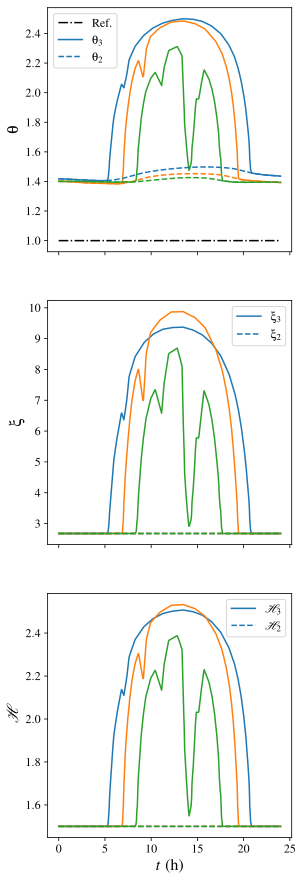

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15,15))

ax1.plot(t, t*0 + 1, 'k-.')
ax1.plot(t, theta3)
ax1.set_prop_cycle(None)
ax1.plot(t, theta2, '--')
ax1.set_ylabel(r'$\theta$')
ax1.legend(['Ref.', r'$\theta_3$', '_nolegend_', '_nolegend_', r'$\theta_2$'])
ax1.set_aspect(1.0/ax1.get_data_ratio(), adjustable='box')

ax2.plot(t, xi3)
ax2.set_prop_cycle(None)
ax2.plot(t, xi2, '--')
plt.xlabel(r'$t$ (h)')
ax2.set_ylabel(r'$\xi$')
ax2.legend([r'$\xi_3$', '_nolegend_', '_nolegend_', r'$\xi_2$'])
ax2.set_aspect(1.0/ax2.get_data_ratio(), adjustable='box')

ax3.plot(t, H3)
ax3.set_prop_cycle(None)
ax3.plot(t, H2, '--')
plt.xlabel(r'$t$ (h)')
ax3.set_ylabel(r'$\mathcal{H}$')
ax3.legend([r'$\mathcal{H}_3$', '_nolegend_', '_nolegend_', r'$\mathcal{H}_2$'])
ax3.set_aspect(1.0/ax3.get_data_ratio(), adjustable='box')

plt.show()

### Isentropic compression 3-4

In [25]:
# The dimensionless power is initialluy constant
W34 = W12 

xi4 = xi3*(W34/G1/H3 + 1)**(gamma/(gamma - 1))
theta4 = (xi4/xi3)**((gamma - 1)/gamma)*theta3
H4 = W34/G1 + H3

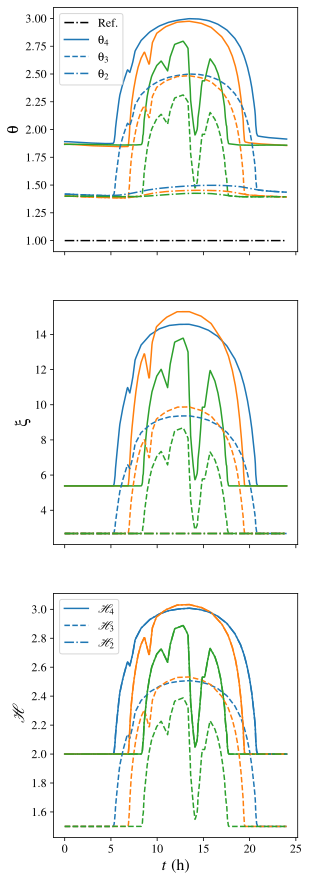

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15,15))

ax1.plot(t, t*0 + 1, 'k-.')
ax1.plot(t, theta4)
ax1.set_prop_cycle(None)
ax1.plot(t, theta3, '--')
ax1.set_prop_cycle(None)
ax1.plot(t, theta2, '-.')
ax1.set_ylabel(r'$\theta$')
ax1.legend(['Ref.', r'$\theta_4$', '_nolegend_', '_nolegend_', r'$\theta_3$',\
           '_nolegend_', '_nolegend_', r'$\theta_2$'])
ax1.set_aspect(1.0/ax1.get_data_ratio(), adjustable='box')

ax2.plot(t, xi4)
ax2.set_prop_cycle(None)
ax2.plot(t, xi3, '--')
ax2.set_prop_cycle(None)
ax2.plot(t, xi2, '-.')
plt.xlabel(r'$t$ (h)')
ax2.set_ylabel(r'$\xi$')
plt.legend([r'$\xi_4$', '_nolegend_', '_nolegend_', r'$\xi_3$', \
           '_nolegend_', '_nolegend_', r'$\xi_2$'])
ax2.set_aspect(1.0/ax2.get_data_ratio(), adjustable='box')

ax3.plot(t, H4)
ax3.set_prop_cycle(None)
ax3.plot(t, H3, '--')
ax3.set_prop_cycle(None)
ax3.plot(t, H2, '-.')
plt.xlabel(r'$t$ (h)')
ax3.set_ylabel(r'$\mathcal{H}$')
ax3.legend([r'$\mathcal{H}_4$', '_nolegend_', '_nolegend_', r'$\mathcal{H}_3$', \
           '_nolegend_', '_nolegend_', r'$\mathcal{H}_2$'])
ax3.set_aspect(1.0/ax3.get_data_ratio(), adjustable='box')

plt.show()